In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Path assignment
path = r'C:\Users\nodnarb\Documents\Electric Vehicles Project'

In [3]:
# Importing data set
df = pd.read_csv(os.path.join(path, '01 Data', 'kings_county_cleaned_new.csv'), index_col = 0)

### Hypothesis: As the square foot of the property increases, so those the property price.

#### 1. Scatterplot visual

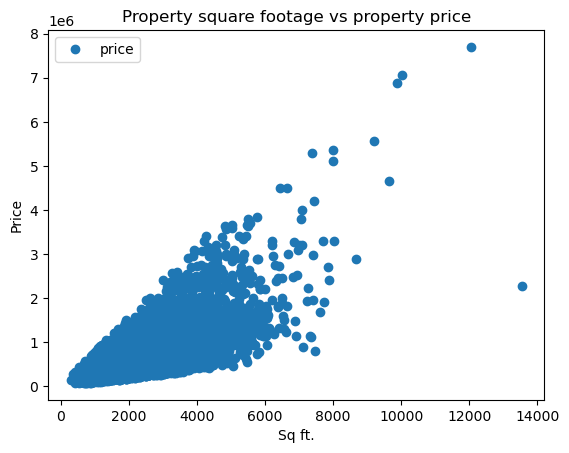

In [6]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'sqft_living', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Property square footage vs property price')  
plt.xlabel('Sq ft.')  
plt.ylabel('Price')  
plt.show()

#### 2. Reshaping vairables into NumPy arrays

In [8]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['sqft_living'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [9]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [10]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

#### 3. Splitting the data into training set and test set

In [12]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 4. Regression analysis

In [14]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [15]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

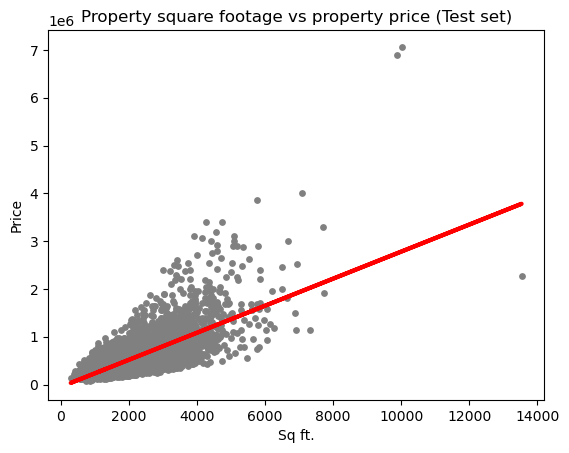

In [17]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Property square footage vs property price (Test set)')
plot_test.xlabel('Sq ft.')
plot_test.ylabel('Price')
plot_test.show()

##### Interpretation: 
The regression line fits the data very well, with all data points near or on the regression line for properties under 5000 sqft. and less than 2 million dollars. 

Properties over 5000 sqft. and over 2 million dollars are less fitted for the regression line. 

There are 3 outlier data points which indicate properties with insanely high square footage or high property prices. While it does not impact our regression test, it would be interesting to single out these properties and understand the reason for the outlier.

#### 5. Summary statistics

In [20]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [21]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[282.82152005]]
Mean squared error:  68887192205.58864
R2 score:  0.48716554046649996


In [22]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,216500.0,2.827187e+05
1,451000.0,6.079635e+05
2,673000.0,6.814971e+05
3,650000.0,3.703934e+05
4,1061600.0,7.974539e+05
5,1225000.0,9.190671e+05
6,500000.0,3.251419e+05
7,453000.0,4.665527e+05
8,379950.0,5.089759e+05
9,468500.0,3.336266e+05


#### Insights

1. The r-squared value sits at 0.49 which indicates a positive relationship but one that is not strong enough to confirm that the square footage is the only factor affecting property prices.
2. There is a lot of variances between the actual values and predicted values supporting the r-squared value of .49.
3. Although many of the data points sit around the regression line, the r-squard value, test set and actual vs predicted values indicate that square footage affects the property price but can not be used as the sole determining factor of property price.

#### Data bias

The model was only created for homes sold in 2014. The model can only account for all the properties that were recorded by the data collection agency. The model's accuracy can only account for properties that fit into this criteria. 